# Multi Layer Perceptron

This in an implementation of a MLP from scratch. This neural network is designed with 2 layers, including one hidden layer and used to perform binary classification.

In [ ]:
# Imports
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import model_selection
import copy

We're going to perform a classification on scikit learn's make_moons dataset. This dataset represents points arranged along two interleaving half circles with more or less noise. The data is shown below.

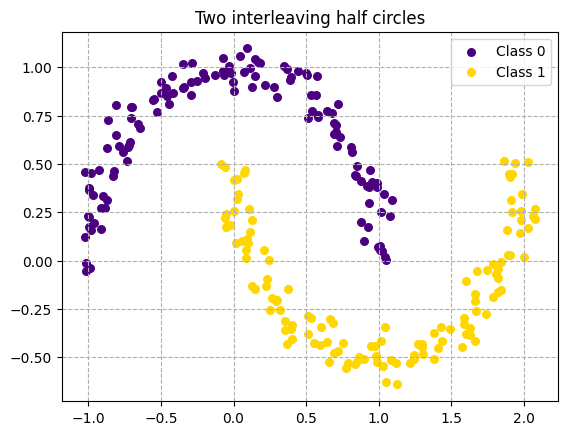

In [125]:
X, y = datasets.make_moons(250, noise = 0.07)

# Plot our data
plt.figure()
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=30, color='indigo', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=30, color='gold', label='Class 1')
plt.title('Two interleaving half circles')
plt.grid(True,which="both", linestyle='--')
plt.legend()
plt.show()

In [126]:
# Split our data into both train and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

We're now going to define some useful functions for our model. In particular, as our model performs a binary classification, we will minimise the binary cross-entropy for each neuron and we will use a sigmoid activation. 
Moreover, to prevent the gradient vanishing during back propagation we will use Relu activation between layers.

In [127]:
def ReLu(x):
    """ Relu activation function"""

    zero = np.zeros((x.shape[0],x.shape[1]))
    return np.maximum(zero,x)


def Sigmoid(x):
    """Sigmoid activation function"""

    return 1 / (1 + np.exp(-x))


def dx_Relu(x):
    """Compute the derivative of the Relu activation function"""

    x[x<=0] = 0
    x[x>0] = 1
    return x

In [ ]:
class MLP():

    """Representation of a Multi-Layer Perceptron with 1 hidden layer

    Attributes
    ----------
    w1, w2, b1, b2: np.array
        weights and biases
    a1, a2, z1, z2: np.array
        values of internal neurons
    dw1, dw2, db1, db2, da1, da2, dz1, dz2: np.array
        partial derivates with respect to the loss

    Methods
    -------
    forward

    backward

    GradientDescent

    """
    
    a1, a2, w1, w2, b1, b2, z1, z2 = [], [], [], [], [], [], [], []
    da1, dw1, dw2, db1, db2, dz1, dz2 = [], [], [], [], [], [], []

    
    def __init__(self,n_0,n_1,n_2,lr = 0.2):

        # We initialize W with little values, it will prevent vanishing or exploding gradient

        self.w1 = np.random.rand(n_0,n_1) * 0.01
        self.w2 = np.random.rand(n_1,n_2) * 0.01

        self.b1 = np.zeros(n_1)
        self.b2 = np.zeros(n_2)
        self.lr = lr
    


    def forward(self, x):
        """ Apply a forward pass, update model parameters in place

        Args:
            x (np.array): Entry data, size (n, n_0)

        Returns:
            np.array: Predicted label by the model, size (n,1)
        """


        self.z1 = x @ self.w1 + self.b1
        self.a1 = ReLu(self.z1)
        self.z2 = self.a1 @ self.w2 + self.b2
        self.a2 = Sigmoid(self.z2)


        return self.a2  


    def backward(self,x,y):
        """Apply a backward pass, update model parameters in place

        Args:
            x (np.array): Entry data, size (n, n_0)
            y (np.array): Predicted label, size (n, 1)

        Returns:
            None
        """

        n = len(y)

        self.dz2 = self.a2 - y
        self.dw2 = (1 / n) * self.a1.T @ self.dz2
        self.db2 = np.mean(self.dz2)

        self.da1 = self.dz2 @ self.w2.T

        self.dz1 = self.da1 * dx_Relu(self.z1)
        self.dw1 = 1/n * x.T @ self.dz1
        self.db1 = np.mean(self.dz1)

        return None
    
    def GradientDescent(self):
        """Update weights and biais (in place) with a learning rate lr

        Returns:
            None
        """

        self.w1 = self.w1 - self.lr * self.dw1
        self.w2 = self.w2 - self.lr * self.dw2

        self.b1 = self.b1 - self.lr * self.db1
        self.b2 = self.b2 - self.lr * self.db2

        return None

In [ ]:
def Cost(hat_y,y):
    """ Compute the cost as the mean of the Loss (binary cross entropy)

    Args:
        hat_y (np.array): Predicted label, size (n, 1)
        y (np.array): True label, size(n, 1)

    Returns:
        np.array: Cost 
    """

    
    loss = - y * np.log(hat_y) - (1 - y) * np.log(1 - hat_y)

    cost = np.sum(loss) / len(y)

    return cost



In [ ]:
def accuracy(hat_y,y):
    """Compute the accuracy of the model

    Args:
        hat_y (np.array): Predicted label, size (n, 1)
        y (np.array): True label, size(n, 1)

    Returns:
        float: Accuracy
    """

    y_prime = copy.deepcopy(hat_y)

    y_prime[y_prime<=0.5] = 0
    y_prime[y_prime>0.5] = 1

    res = np.sum(y_prime == y)
    
    return res/len(y)*100

### Training phase

In [ ]:
epochs = 1000 # Number of epochs

n_0 = X_train.shape[1] # Number of data features
n_1 = 15 # Hidden Neuron
n_2 = 1 # Number of Class
lr = 0.1 # Learning rate

model = MLP(n_0,n_1,n_2,lr)

y_train = y_train.reshape((len(y_train),1))
y_test = y_test.reshape((len(y_test),1))

for epoch in range(epochs):


    # Forward pass
    hat_y = model.forward(X_train)


    # Backward pass
    model.backward(X_train,y_train)

    # Gradient Descent
    model.GradientDescent()

    # Compute gradient and cost on the test set
    if epoch % (epochs/10) == 0:

        hat_y_test = model.forward(X_test)

        acc = accuracy(hat_y_test,y_test)
        J = Cost(hat_y_test,y_test)
        print("Epoch number : " + str(epoch) + " | Accuracy : " + str(acc) + "% | Cost function : " + str(J))



Epoch number : 0 | Accuracy : 32.0% | Cost function : 0.6939680347150002
Epoch number : 100 | Accuracy : 32.0% | Cost function : 0.7238132171990449
Epoch number : 200 | Accuracy : 78.0% | Cost function : 0.6349886454444532
Epoch number : 300 | Accuracy : 88.0% | Cost function : 0.43612235525437026
Epoch number : 400 | Accuracy : 90.0% | Cost function : 0.34136767856620176
Epoch number : 500 | Accuracy : 88.0% | Cost function : 0.3089593845629253
Epoch number : 600 | Accuracy : 88.0% | Cost function : 0.29954621567745077
Epoch number : 700 | Accuracy : 84.0% | Cost function : 0.2972590543158592
Epoch number : 800 | Accuracy : 84.0% | Cost function : 0.29663243665969624
Epoch number : 900 | Accuracy : 84.0% | Cost function : 0.2964283991873827
